<center> <img src=https://i.imgur.com/0TSSaqL.png width="550"> </center>
<center> <h3><b> M7 - U1 Algoritmos Supervisados</h3></b> </center>
<center> <h4><b>Ejercicio Entregable: Electrocardiograma</h4></b> </center>


El caso práctico consiste en encontrar un modelo supervisado capaz de clasificar correctamente el conjunto de datos `data_reto.csv`.

Para esto, te pedimos que entrenes distintas familias de modelos supervisados (vistas en esta unidad), donde en el caso de que sea posible presenta al menos 2 configuraciones distintas de la misma familia. Por ejemplo, 2 modelos de SVM cambiando el hiperparámetro C en la configuración.

Datos: `data_reto.csv`, `data_onu.csv`

**Variables**

El dataset consiste en un conjunto de 30 parámetros calculados a partir del Electrocardiograma (ECG). Estos parámetros, recogen distintas características del ECG, desde su comportamiento temporal como a amplitud, pendiente, etc. Hasta carácterísticas un poco más complejas como variables espectrales. A continuación, se muestra la lista completa de parámetros:

**Parámetros temporales**

* TCI = threshold crossing interval

* TCSC = threshold crossing sample count

* Exp = exponencial estandard

* Expmod = exponencial modificada

* MAV = valor medio absoluto

* count1

* count2

* count3

* x1

* x2

* bCP

**Parámetros espectrales**

* vFleak = VF filter

* M

* A1

* A2

* A3

* x3

* x4

* x5

* bWT

**Parámetros de tipo tiempo-frecuencia**

* Li = basada en el análisis de ondas del ECG.

**Parámetros de complejidad del ECG**

* CM = medida de la complejidad

* CVbin = covarianza

* abin = area

* Frqbin = frecuencia

* Kurt = Curtosis de una señal binaria extraída del ECG

* PSR = La reconstrucción del espacio de fase

* HILB = La transformación de Hilbert

* SamEn = Muestra de entropía


**Variable dependiente**

La variable que utilizaremos para clasificar los datos será **VF**. Donde:
- 0 nos indica que la persona está sana
- 1 nos indica que la persona tiene una Fibrilación Ventricular (VF).

# Paquete necesario para las librerias

# Librerias Necesarias para la implementacion del modelo

In [41]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
%matplotlib inline

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

# Carga datos

Visualizamos que la variable etiqueta es VF


In [5]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("data_reto.csv", encoding='utf-8')
df.head()


Saving data_reto.csv to data_reto.csv


,TCI,TCSC,exp,expmod,cm,cvbin,frqbin,abin,kurt,vfleak,...,x1,x2,bCP,bWT,bW,Li,count1,count2,count3,VF
0,360.08,42.933,60,135,0.109620,0.15281,1.75,812,0.23413,0.65476,...,0.52618,0.003299,0.258,0.48395,2.1362,49.342,19.25,73.75,8.0208,0
1,333.41,54.733,120,150,0.149490,0.19259,2.25,740,-0.64581,0.45448,...,0.61896,0.002891,0.220,0.32814,1.5259,28.785,45.00,89.25,25.8700,0
2,359.18,46.600,90,180,0.169420,0.23900,3.00,606,0.26447,0.61511,...,0.56023,0.005732,0.302,0.34270,1.8921,32.381,28.50,78.25,13.4750,0
3,416.67,41.867,0,135,0.119590,0.15029,1.75,816,0.65061,0.65536,...,0.50644,0.003233,0.288,0.47740,1.8311,16.677,28.50,77.50,13.6130,0
4,544.08,49.333,120,120,0.099658,0.16490,2.00,792,-0.14313,0.61120,...,0.28983,0.003547,0.266,0.48095,2.0142,12.484,24.75,74.75,10.5270,0


In [6]:
# Vemos cuantas filas y columnas tiene el data frame
df.shape


(9146, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TCI     9146 non-null   float64
 1   TCSC    9146 non-null   float64
 2   exp     9146 non-null   int64  
 3   expmod  9146 non-null   int64  
 4   cm      9146 non-null   float64
 5   cvbin   9146 non-null   float64
 6   frqbin  9146 non-null   float64
 7   abin    9146 non-null   int64  
 8   kurt    9146 non-null   float64
 9   vfleak  9146 non-null   float64
 10  M       9146 non-null   float64
 11  A1      9146 non-null   float64
 12  A2      9146 non-null   float64
 13  A3      9146 non-null   float64
 14  mav     9146 non-null   float64
 15  psr     9146 non-null   float64
 16  hilb    9146 non-null   float64
 17  SamEn   9146 non-null   float64
 18  x3      9146 non-null   float64
 19  x4      9146 non-null   int64  
 20  x5      9146 non-null   float64
 21  x1      9146 non-null   float64
 22  

# EDA

Chequeamos los valos unicos y para visualizar que variables contiene mas informacion para entrenar el modelo.

In [8]:
df.nunique().sort_values()

,0
VF,2
expmod,25
x4,31
exp,31
frqbin,34
cm,34
x5,72
psr,133
hilb,150
bW,181


Revisamos duplicados y visualizamos que no tiene.


In [9]:
df.duplicated().sum()

0

El método describe() nos da información estadística básica de nuestros datos: Media, desviacion estándar, mínimo y máximo de cada variable numérica.

La media esta muy variable por lo cual concluimos que la distribucion de las variables son dispersas y logramos visualizar en varias variables valores atipicos comparando el Q3 con el maximo, que tenemos que se necesitan revisar.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TCI,9146.0,504.320221,262.511975,121.520000,297.872500,436.110000,631.140000,1861.20000
TCSC,9146.0,26.311054,20.286627,2.266700,10.533000,17.333000,42.450250,83.86700
exp,9146.0,86.337743,74.512381,0.000000,30.000000,75.000000,120.000000,450.00000
expmod,9146.0,145.712880,66.011499,15.000000,90.000000,135.000000,195.000000,375.00000
cm,9146.0,0.153696,0.055616,0.029897,0.109620,0.149490,0.189350,0.35877
cvbin,9146.0,0.182451,0.063978,0.015760,0.152180,0.202680,0.234860,0.25025
frqbin,9146.0,2.793489,1.310632,0.000000,1.750000,2.500000,3.750000,8.75000
abin,9146.0,727.499344,126.400750,500.000000,624.000000,718.000000,813.000000,984.00000
kurt,9146.0,6.194699,5.669886,-1.618400,0.690283,6.123800,9.218200,57.36900
vfleak,9146.0,0.709490,0.167951,0.114860,0.662507,0.771580,0.824950,0.91703


Con value_counts() vemos el num de obs tenemos en cada valor de la clase.


0= ritmo normal
1= ritmo afectado

In [11]:
df["VF"].value_counts()


,count
VF,
0,7590
1,1556


Visualizamos un histograma de las variables numericas, podemos ver gráficamente entre qué valores se comprenden sus mínimos y máximos y en qué intervalos concentran la mayor densidad de registros.

Se presentan varios sesgos positivos y negativos por lo que vamos a tener algunos outliers

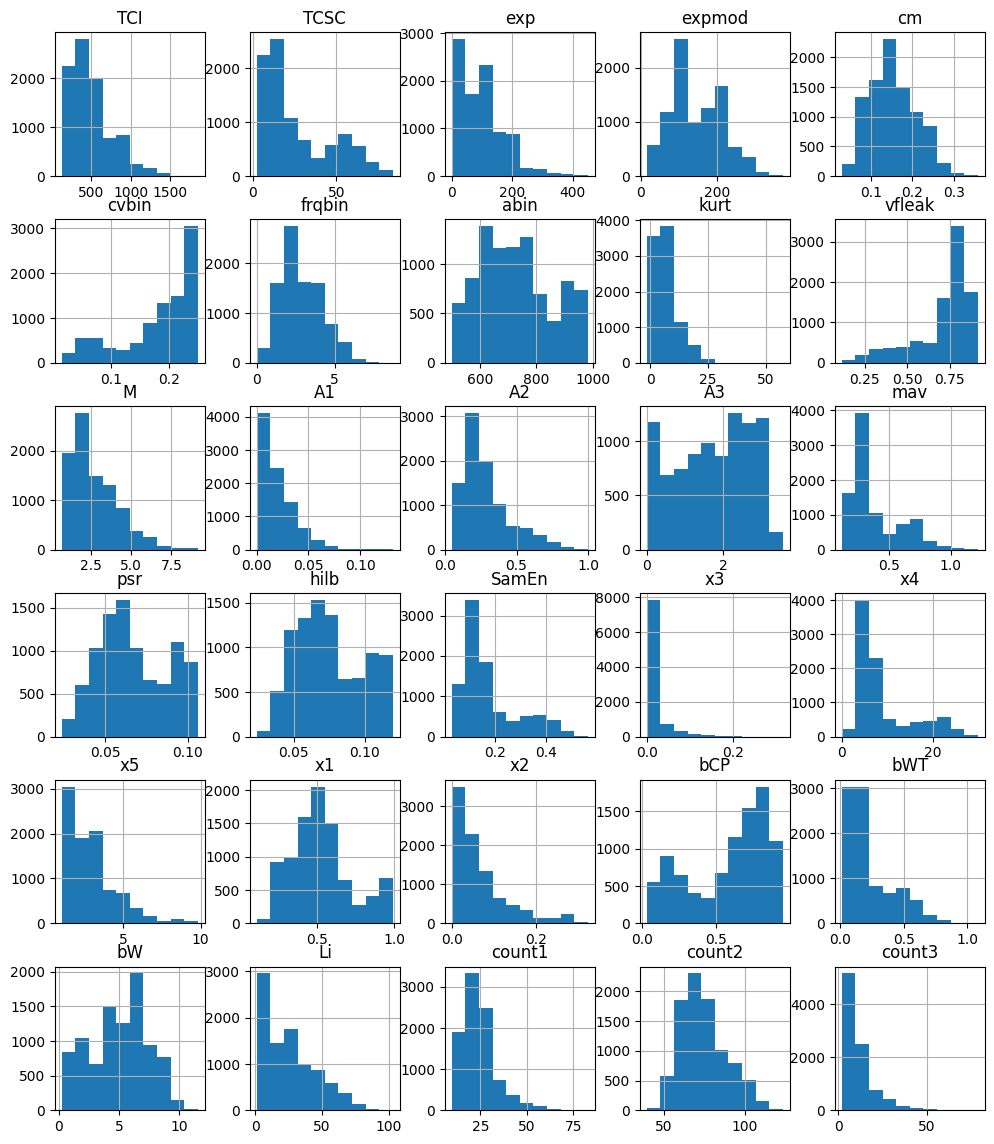

In [12]:
df.drop(['VF'], axis=1).hist(figsize=(12, 14))

# Mostrar el gráfico
plt.show()

Iba hacer un boxplot pero encontre mejor opcion contar los outliers para ver que variables tienen mas y vemos que las variables X3, X4 y otras tienen muchos outliers.

In [13]:
X = df.drop(columns=['VF'])

# Hacemos una función para detectar outliers con IQR
def detectar_outliers_iqr(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    return sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True)

# Ejecutar la función y mostrar las columnas con más outliers
outliers_detectados = detectar_outliers_iqr(X)
print("Columnas con más outliers:", outliers_detectados)

Columnas con más outliers: [('x3', 1562), ('x4', 1008), ('vfleak', 894), ('SamEn', 797), ('count3', 721), ('A2', 485), ('x2', 475), ('count1', 455), ('x5', 370), ('TCI', 279), ('A1', 270), ('exp', 242), ('bWT', 228), ('M', 188), ('mav', 164), ('x1', 133), ('kurt', 111), ('cvbin', 42), ('count2', 31), ('Li', 27), ('cm', 18), ('frqbin', 18), ('expmod', 8), ('TCSC', 0), ('abin', 0), ('A3', 0), ('psr', 0), ('hilb', 0), ('bCP', 0), ('bW', 0)]


Realizamos algunos boxplot para visualizar como se distribuyen los outliers

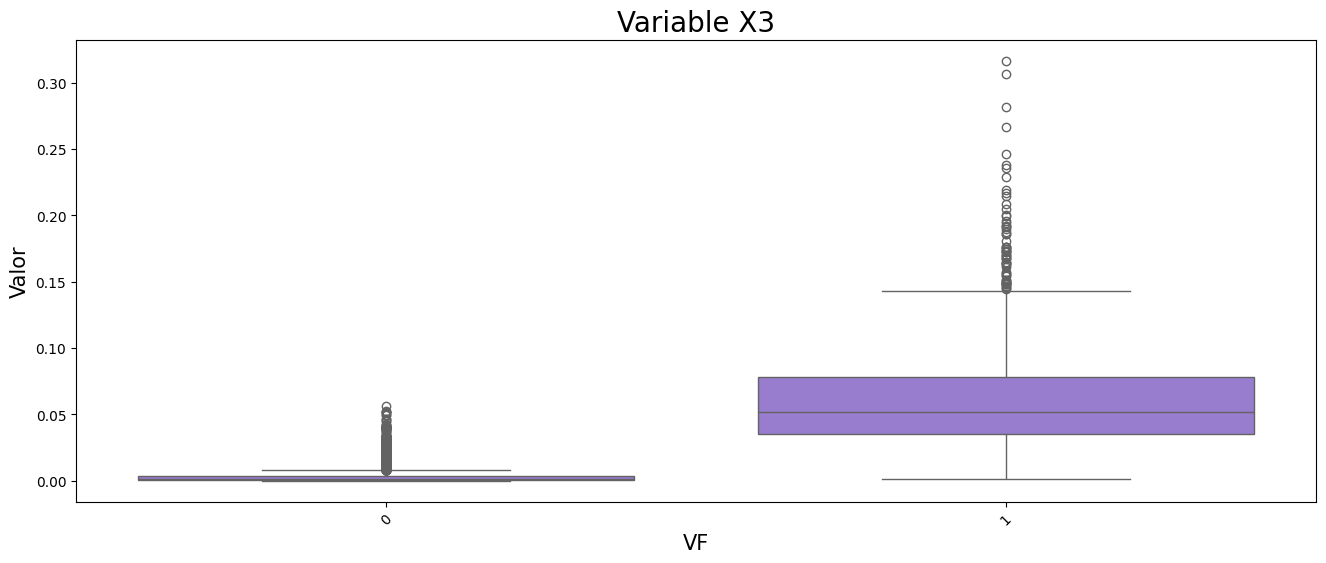

In [14]:
plt.figure(figsize=(16,6))

graph = sns.boxplot(x='VF', y='x3',
                 data=df,
                 color='mediumpurple')
graph.set_title("Variable X3", fontsize=20)
graph.set_xlabel("VF", fontsize=15)
graph.tick_params(axis='x', rotation=45)
graph.set_ylabel("Valor", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels())

plt.show()

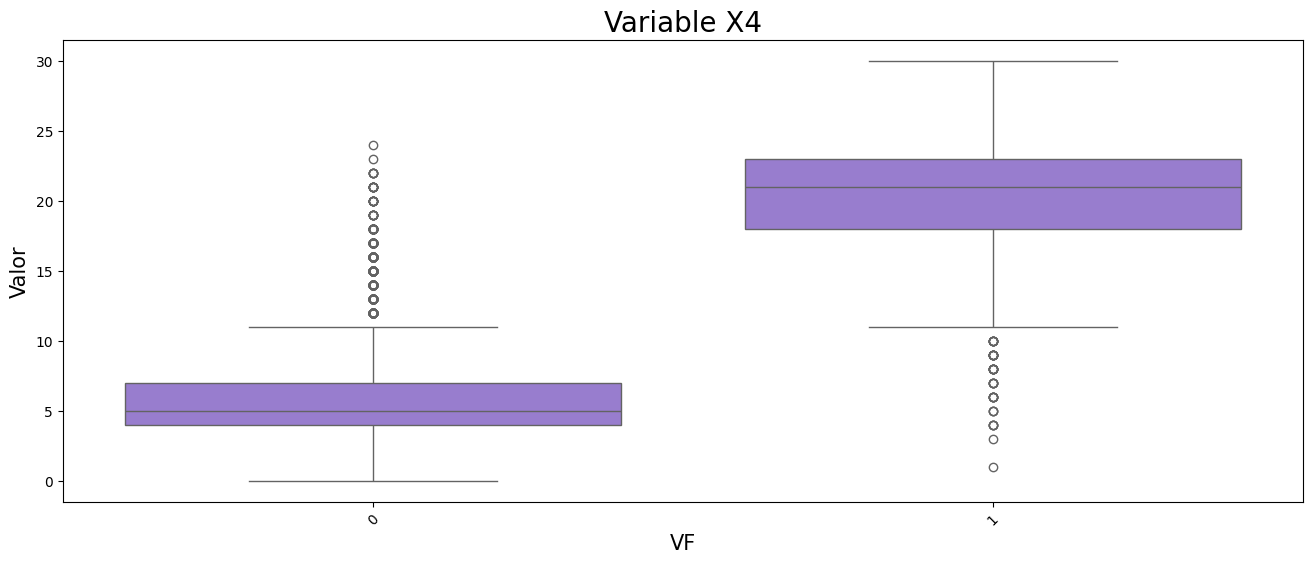

In [15]:
plt.figure(figsize=(16,6))

graph = sns.boxplot(x='VF', y='x4',
                 data=df,
                 color='mediumpurple')
graph.set_title("Variable X4", fontsize=20)
graph.set_xlabel("VF", fontsize=15)
graph.tick_params(axis='x', rotation=45)
graph.set_ylabel("Valor", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels())

plt.show()

Dado que los outliers no interfirieron con mi modelo, no les hice alguna correccion.

#Correlacion

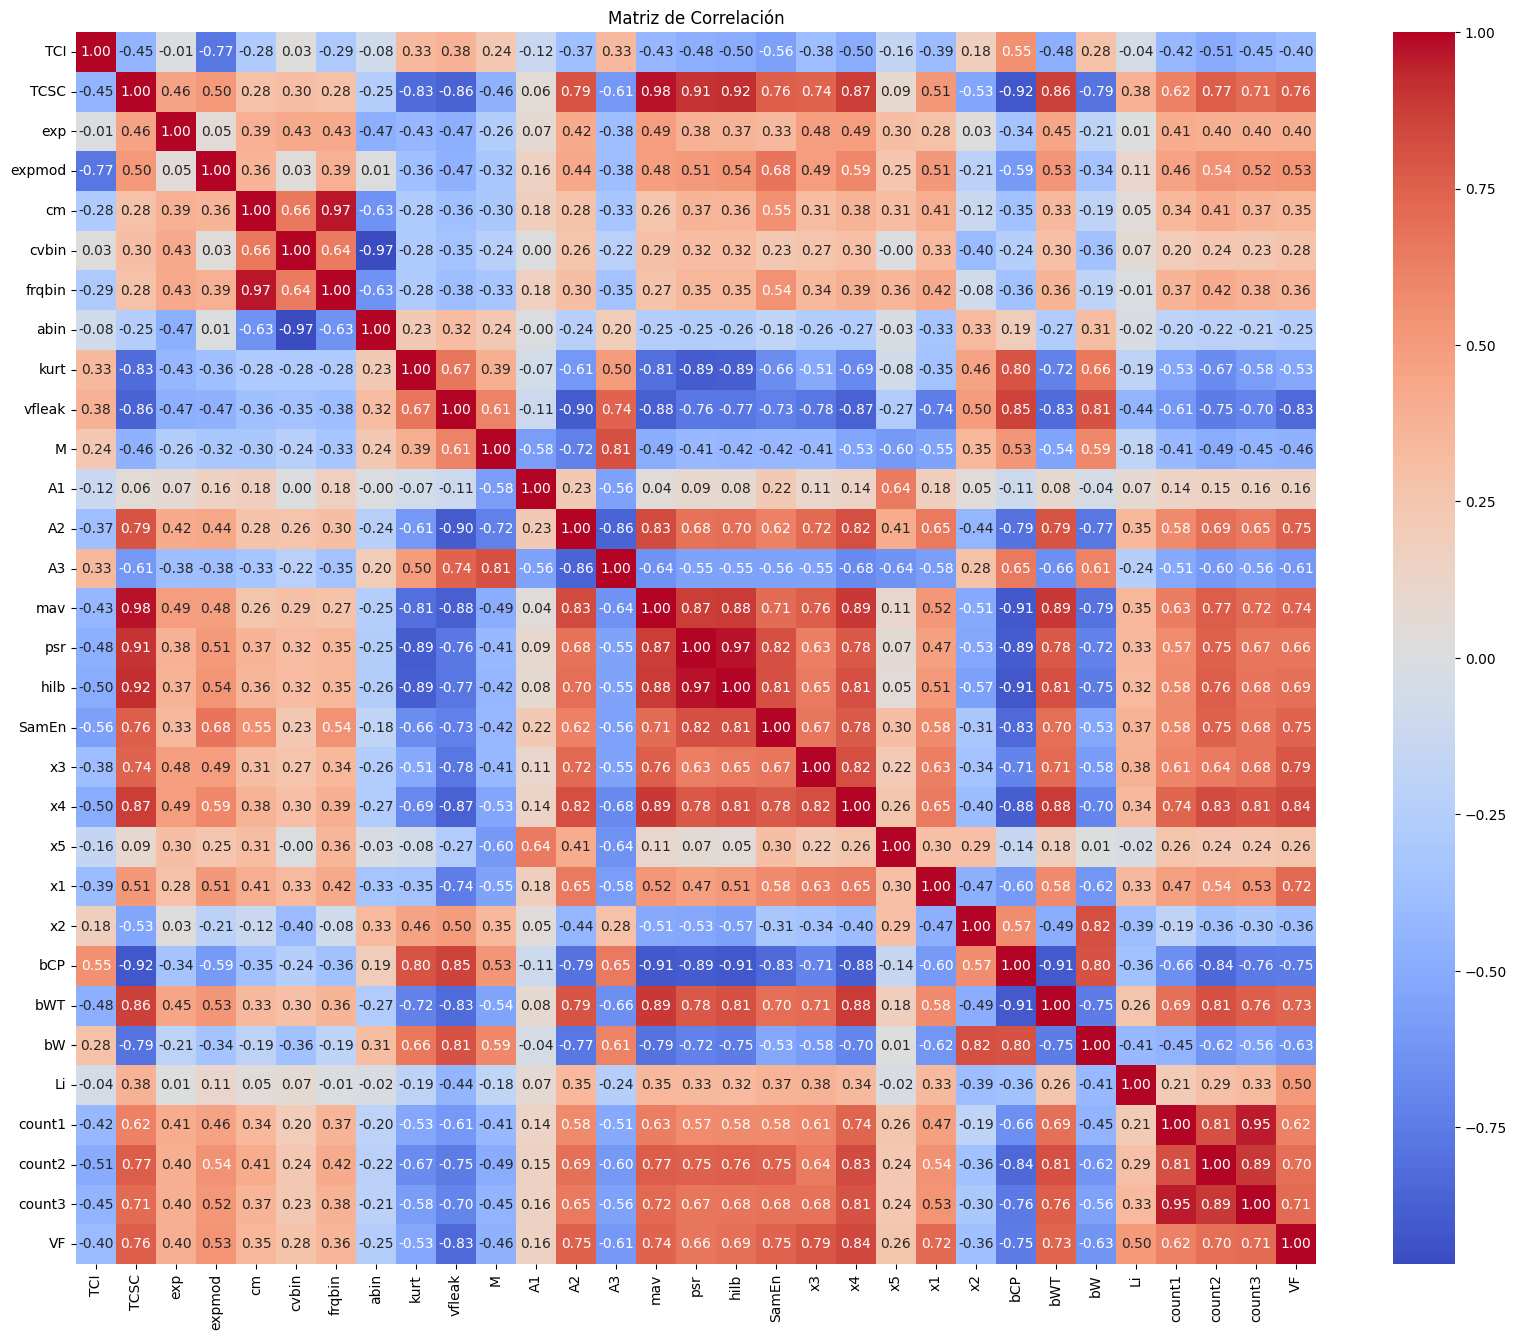

In [16]:
# Calcular la matriz de correlación
corr = df.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [17]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Establecer un umbral de correlación para identificar correlaciones altas
threshold = 0.95

high_corr_pairs = []

# Iterar sobre la matriz de correlación
for col in corr_matrix.columns:
    for row in corr_matrix.index:

        if col != row and abs(corr_matrix.loc[row, col]) > threshold:
            high_corr_pairs.append((row, col, corr_matrix.loc[row, col]))

# Crear un DataFrame para mostrar las correlaciones altas
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Columna 1', 'Columna 2', 'Correlación'])
high_corr_df = high_corr_df.sort_values(by='Correlación', ascending=False)

print("Correlaciones altas:")
print(high_corr_df)

Correlaciones altas:
  Columna 1 Columna 2  Correlación
0       mav      TCSC     0.976458
5      TCSC       mav     0.976458
7       psr      hilb     0.969451
6      hilb       psr     0.969451
1    frqbin        cm     0.968645
3        cm    frqbin     0.968645
8    count3    count1     0.954993
9    count1    count3     0.954993
4     cvbin      abin    -0.968397
2      abin     cvbin    -0.968397


Al analizar los datos vemos que algunas variables tiene una correlacion muy alta por lo que tome la decision de eliminarlas porque no me daba valor en el modelo y puedo tener multicolinealidad

In [18]:
# Lista de columnas a eliminar
columnas_a_eliminar = ["TCSC", "psr", "cm", "count3", "bCP", "cvbin"]

df_limpio = df.drop(columns=columnas_a_eliminar)

print(df_limpio.head())

      TCI  exp  expmod  frqbin  abin     kurt   vfleak       M        A1  \
0  360.08   60     135    1.75   812  0.23413  0.65476  2.0421  0.014453   
1  333.41  120     150    2.25   740 -0.64581  0.45448  1.3178  0.039420   
2  359.18   90     180    3.00   606  0.26447  0.61511  2.0970  0.008673   
3  416.67    0     135    1.75   816  0.65061  0.65536  1.7065  0.016068   
4  544.08  120     120    2.00   792 -0.14313  0.61120  1.9452  0.000729   

        A2  ...  x4      x5       x1        x2      bWT      bW      Li  \
0  0.30493  ...  12  1.8930  0.52618  0.003299  0.48395  2.1362  49.342   
1  0.48202  ...  14  2.6258  0.61896  0.002891  0.32814  1.5259  28.785   
2  0.31914  ...   9  1.8930  0.56023  0.005732  0.34270  1.8921  32.381   
3  0.39236  ...   9  2.0151  0.50644  0.003233  0.47740  1.8311  16.677   
4  0.42743  ...  10  1.8930  0.28983  0.003547  0.48095  2.0142  12.484   

   count1  count2  VF  
0   19.25   73.75   0  
1   45.00   89.25   0  
2   28.50   78.25   

# Split

Spliteamos el df entre variables independientes (X) y variables dependientes (y)

In [19]:
X = np.array(df_limpio.drop(['VF'],axis= 1))
y = np.array(df_limpio['VF'])
X.shape

(9146, 24)

## Escalado del df ya que vamos a probar con modelos de regresion y utilizamos el standardScaler ya que es la mejor opcion en este caso

In [20]:
mms = StandardScaler()

In [21]:
X_mms = mms.fit_transform(X)

Subdividimos nuestros datos de entrada en forma aleatoria utilizando 80% de registros para entrenamiento y 20% para validar.

Introducimos una semilla para poder reproducir la selección aleatoria.

In [22]:
validation_size = 0.2
seed = 1123
train_X, val_X, train_y, val_y = model_selection.train_test_split(X_mms, y, test_size=validation_size, random_state=seed)

# Modelos

## Modelo Logistic Regression

Instaciamos el modelo LR y lo entrenamos.

In [23]:
model = linear_model.LogisticRegression()
model.fit(train_X,train_y)

LogisticRegression()

In [24]:
kfold = model_selection.KFold(n_splits=5) # indica que el conjunto de datos se dividirá en 5 partes

cv_results = model_selection.cross_val_score(model, train_X, train_y,
                                             cv=kfold,
                                             scoring='accuracy')

print(cv_results.mean())

0.9874245972606628


In [25]:
pred = model.predict(val_X)
print(accuracy_score(val_y, pred))

0.985792349726776


Las probabilidades son extremadamente cercanas a 1 para la clase dominante y muy cercanas a 0 para la otra clase. Esto nos indica que el modelo está muy seguro de sus predicciones

In [26]:
prob = model.predict_proba(val_X)
print(prob)

[[9.99996383e-01 3.61734150e-06]
 [9.99894677e-01 1.05322815e-04]
 [9.99991890e-01 8.10989894e-06]
 ...
 [9.99907765e-01 9.22349674e-05]
 [9.99931491e-01 6.85091860e-05]
 [9.99980347e-01 1.96529069e-05]]


In [27]:
pred = model.predict(val_X)
print(pred)

[0 0 0 ... 0 0 0]


 El modelo predijo correctamente 1494 ritmos cardíacos normales y el modelo erróneamente clasificó 12 ritmos cardíacos normales como afectados.

 El modelo no detectó 14 ritmos cardíacos afectados, clasificándolos como normales y el modelo predijo correctamente 310 ritmos cardíacos afectados.


In [28]:
print(confusion_matrix(val_y, pred))

[[1494   12]
 [  14  310]]


Tenemos un muy buen rendimiento ya que el modelo tiene un rendimiento excelente, con alta precisión, alto recall y un bajo número de errores tanto para la clase 0 (normal) como para la clase 1 (afectado) y aparte de esto tenemos un balance muy bueno.

In [29]:
print(classification_report(val_y, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1506
           1       0.96      0.96      0.96       324

    accuracy                           0.99      1830
   macro avg       0.98      0.97      0.98      1830
weighted avg       0.99      0.99      0.99      1830



## KNN

In [30]:
model_knn = KNeighborsClassifier()
model_knn.fit(train_X,train_y)

kfold = model_selection.KFold(n_splits=5)

cv_results = model_selection.cross_val_score(model_knn, train_X, train_y,
                                             cv=kfold,
                                             scoring='accuracy')

print(cv_results.mean())

pred_knn = model_knn.predict(val_X)
print(accuracy_score(val_y, pred_knn))

prob = model_knn.predict_proba(val_X)

print(confusion_matrix(val_y, pred_knn))

print(classification_report(val_y, pred_knn))

0.9935754998524627
0.9923497267759562
[[1503    3]
 [  11  313]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1506
           1       0.99      0.97      0.98       324

    accuracy                           0.99      1830
   macro avg       0.99      0.98      0.99      1830
weighted avg       0.99      0.99      0.99      1830



## Random Forest

In [31]:
model_rf = RandomForestClassifier()
model_rf.fit(train_X,train_y)

kfold = model_selection.KFold(n_splits=5)

cv_results = model_selection.cross_val_score(model_rf, train_X, train_y,
                                             cv=kfold,
                                             scoring='accuracy')

print(cv_results.mean())

pred_rf = model_rf.predict(val_X)
print(accuracy_score(val_y, pred_rf))

prob = model_rf.predict_proba(val_X)

print(confusion_matrix(val_y, pred_rf))

print(classification_report(val_y, pred_rf))

0.9928920662311518
0.9901639344262295
[[1500    6]
 [  12  312]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1506
           1       0.98      0.96      0.97       324

    accuracy                           0.99      1830
   macro avg       0.99      0.98      0.98      1830
weighted avg       0.99      0.99      0.99      1830



## XGBoost

In [32]:
model_xg = XGBClassifier()
model_xg.fit(train_X,train_y)

kfold = model_selection.KFold(n_splits=5)

cv_results = model_selection.cross_val_score(model_xg, train_X, train_y,
                                             cv=kfold,
                                             scoring='accuracy')

print(cv_results.mean())

pred_xg = model_xg.predict(val_X)
print(accuracy_score(val_y, pred_xg))

prob = model_xg.predict_proba(val_X)

print(confusion_matrix(val_y, pred_xg))
print(classification_report(val_y, pred_xg))

0.9949424604730902
0.9918032786885246
[[1500    6]
 [   9  315]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1506
           1       0.98      0.97      0.98       324

    accuracy                           0.99      1830
   macro avg       0.99      0.98      0.99      1830
weighted avg       0.99      0.99      0.99      1830



In [33]:
model_xg

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

## Grid

In [34]:
## Creación de un pipeline que incorpora un modelo de regresión logística
pipec = Pipeline([('algoritmo',LogisticRegression())])
# Definición de los posibles parámetros para cada modelo en la búsqueda de cuadrícula (GridSearchCV)
gridc = [{'algoritmo': [LogisticRegression()],
         'algoritmo__solver': ['saga'],
         'algoritmo__penalty': ['elasticnet', 'l1', 'l2', 'none'],
         'algoritmo__C': [0,0.25,0.5,0.75,1]},

         {'algoritmo': [KNeighborsClassifier()],
          'algoritmo__n_neighbors': [3,5]},

        {'algoritmo': [RandomForestClassifier()],
         'algoritmo__max_depth': [5,10,15],
         'algoritmo__n_estimators': [50,100,200]},

        {'algoritmo': [XGBClassifier()],
         'algoritmo__verbosity': [0],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1,None],
         'algoritmo__max_depth': [5,10,20,None],
         'algoritmo__reg_alpha': [0,0.1,0.5,1],
         'algoritmo__reg_lambda': [0.01,0.1,1],
         'algoritmo__n_estimators': [100,500,1000]}
       ]

El mejor modelo es el XGBClassifier está produciendo los mejores resultados en este conjunto de datos, con una puntuación de prueba promedio muy alta y estabilidad en los resultados

In [35]:
grid_search = GridSearchCV(estimator= pipec,
                            param_grid = gridc,
                            cv = 5,
                            scoring = 'accuracy',
                            verbose = 0)

model_grid = grid_search.fit(train_X,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__C,param_algoritmo__penalty,param_algoritmo__solver,param_algoritmo__n_neighbors,param_algoritmo__max_depth,...,param_algoritmo__verbosity,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
525,0.418291,0.005821,0.004775,0.000130,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,NaN,10,...,0.0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.993852,0.994532,0.996582,0.996582,0.994532,0.995216,0.001143,1
561,0.421453,0.005635,0.005122,0.000387,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,NaN,20,...,0.0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.993852,0.994532,0.996582,0.996582,0.994532,0.995216,0.001143,1
451,0.444705,0.009376,0.005009,0.000169,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,NaN,None,...,0.0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.993852,0.995215,0.996582,0.997266,0.993165,0.995216,0.001558,3
199,0.555382,0.022305,0.006420,0.000281,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,NaN,5,...,0.0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.993852,0.995215,0.996582,0.997266,0.993165,0.995216,0.001558,3
204,0.642137,0.011026,0.007101,0.000164,"XGBClassifier(base_score=None, booster=None, c...",NaN,NaN,NaN,NaN,5,...,0.0,"{'algoritmo': XGBClassifier(base_score=None, b...",0.994536,0.994532,0.996582,0.997266,0.993165,0.995216,0.001497,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,0.000800,0.000076,0.000000,0.000000,LogisticRegression(),1.00,none,saga,NaN,NaN,...,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,740
15,0.009513,0.017321,0.000000,0.000000,LogisticRegression(),0.75,none,saga,NaN,NaN,...,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,740
16,0.019772,0.037874,0.000000,0.000000,LogisticRegression(),1.00,elasticnet,saga,NaN,NaN,...,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,740
4,0.000737,0.000070,0.000000,0.000000,LogisticRegression(),0.25,elasticnet,saga,NaN,NaN,...,NaN,"{'algoritmo': LogisticRegression(), 'algoritmo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,740


In [36]:
model_grid.best_estimator_

Pipeline(steps=[('algoritmo',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=1000, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [37]:
pred_b = model_grid.best_estimator_.predict_proba(val_X)[:, 1]
pred_b

array([3.7219808e-05, 6.3199419e-05, 1.4847271e-05, ..., 6.2211961e-06,
       1.1252490e-05, 3.6251483e-06], dtype=float32)

In [38]:
pred_grid = model_grid.best_estimator_.predict(val_X)
print(accuracy_score(val_y, pred_grid))

0.9934426229508196


## Mejor modelo

Obtenemos que los mejores modelos son XGBoost y KNN

In [39]:
print('Logistic Regression', round(accuracy_score(val_y, pred),3)*100)
print('KNN', round(accuracy_score(val_y, pred_knn),4)*100)
print('Random Forest', round(accuracy_score(val_y, pred_rf),3)*100)
print('XGBoost', round(accuracy_score(val_y, pred_xg),3)*100)
print(model_grid.best_estimator_, round(accuracy_score(val_y, pred_grid),3)*100)

Logistic Regression 98.6
KNN 99.22999999999999
Random Forest 99.0
XGBoost 99.2
Pipeline(steps=[('algoritmo',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missin

Pero en este caso voy a elegir el XGBoost

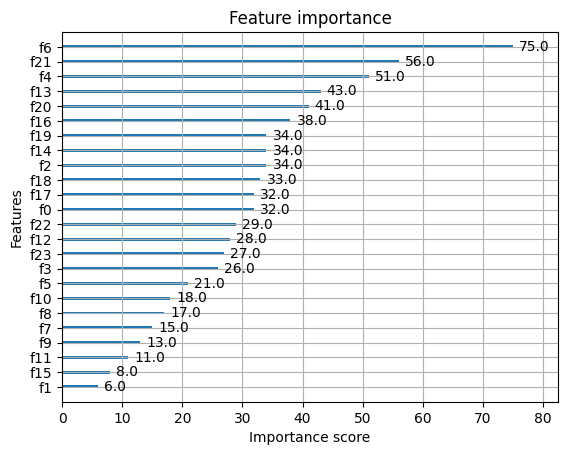

In [42]:
plot_importance(model_xg)
pyplot.show()

# Validacion
Ahora se cargara un test llamado data_onu.csv para hacer el test sobre el entrenamiento

Cargamos los datos

In [43]:
from google.colab import files
uploaded = files.upload()


Saving data_onu.csv to data_onu.csv


In [44]:
datos_onu = pd.read_csv('data_onu.csv') # Lo leemos con pandas

# Mostrar las primeras filas para inspección
print(datos_onu.head())
print(datos_onu.info())


      TCI    TCSC  exp  expmod        cm    cvbin  frqbin  abin      kurt  \
0  438.42  46.800  120     120  0.099658  0.16016    1.75   800  0.153170   
1  449.10  46.467   60     120  0.119590  0.15713    1.75   805 -0.053068   
2  466.82  49.533   90     135  0.099658  0.16490    1.75   792 -0.159920   
3  549.38  52.600  120     120  0.089692  0.17177    1.75   780 -0.399490   
4  426.55  56.533  135     105  0.119590  0.18101    2.25   763 -0.430150   

    vfleak  ...       x1        x2    bCP      bWT      bW      Li  count1  \
0  0.58320  ...  0.53153  0.003338  0.354  0.29044  1.6479  12.889   23.50   
1  0.60206  ...  0.56449  0.002208  0.224  0.47144  1.7700  10.418   21.25   
2  0.58141  ...  0.33149  0.002520  0.270  0.57652  2.0752  18.861   18.25   
3  0.59277  ...  0.25013  0.001687  0.264  0.56407  1.9531  14.784   22.00   
4  0.51779  ...  0.49224  0.001386  0.242  0.45114  1.4648  12.842   28.75   

   count2   count3  VF  
0   78.75  10.9500   0  
1   83.75  10.7210

In [45]:
X_onu = datos_onu.drop('VF', axis=1)
y_onu = datos_onu['VF']

# Eliminamos las mismas columnas que eliminamos en el otro dataset
columns_to_remove = ["TCSC", "psr", "cm", "count3", "bCP", "cvbin"]
X_onu = X_onu.drop(columns_to_remove, axis=1)

# Ver las columnas restantes
print(f"Columnas restantes: {X_onu.columns}")

Columnas restantes: Index(['TCI', 'exp', 'expmod', 'frqbin', 'abin', 'kurt', 'vfleak', 'M', 'A1',
       'A2', 'A3', 'mav', 'hilb', 'SamEn', 'x3', 'x4', 'x5', 'x1', 'x2', 'bWT',
       'bW', 'Li', 'count1', 'count2'],
      dtype='object')


Escalamos los datos

In [46]:
scaler = StandardScaler()
X_onu_scaled = scaler.fit_transform(X_onu)

In [47]:
# Realizamos predicciones con el modelo entrenado
y_pred = model_xg.predict(X_onu_scaled)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Calculamos el accuracy

In [48]:
accuracy = accuracy_score(y_onu, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_onu, y_pred))

cm = confusion_matrix(y_onu, y_pred)
print(cm)

Accuracy: 99.50%
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       170
           1       0.97      1.00      0.98        30

    accuracy                           0.99       200
   macro avg       0.98      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

[[169   1]
 [  0  30]]


# **Predicción**


In [54]:
# Crear DataFrame con el nuevo registro, aqui tuve que eliminar las columnas que habia eliminado anteriormente para poder realizar la prediccion.
Pred_new = pd.DataFrame({
    "TCI": [549.38],
    "exp": [120],
    "expmod": [120],
    "frqbin": [1.75],
    "abin": [780],
    "kurt": [-0.399490],
    "vfleak": [0.59277],
    "M": [1.70170],
    "A1": [0.000000],
    "A2": [0.519410],
    "A3": [0.812570],
    "mav": [0.71385],
    "hilb": [0.089375],
    "SamEn": [0.127430],
    "x3": [0.011373],
    "x4": [15],
    "x5": [1.8930],
    "x1": [0.25013],
    "x2": [0.001687],
    "bWT": [0.564070],
    "bW": [1.95310],
    "Li": [14.7840],
    "count1": [22.00],
    "count2": [86.75],
})

# Usar el DataFrame creado para la transformación
X_new = Pred_new
X_new_mms = mms.transform(X_new)
print(X_new_mms)

# Realizar la predicción
pred_new = model_grid.best_estimator_.predict(X_new_mms)
print('El nuevo valor pertenece al grupo', pred_new,
      ' con una prob. de: ', np.max(model_xg.predict_proba(X_new_mms)))


[[ 0.17165786  0.451792   -0.38954252 -0.79621565  0.41537354 -1.16308328
  -0.69500425 -0.72194476 -1.12232846  1.37418723 -0.94731323  1.62585304
   0.63420399 -0.43920293 -0.06578133  1.04445022 -0.68682483 -1.40653318
  -0.9444097   1.79765182 -1.25552364 -0.57174851 -0.24764708  0.86482546]]
El nuevo valor pertenece al grupo [0]  con una prob. de:  0.99996555


In [56]:
# Crear el DataFrame con los nuevos datos usando solo las columnas del entrenamiento
Pred_new = pd.DataFrame({
    "TCI": [321.03],
    "exp": [90],
    "expmod": [195],
    "frqbin": [5.25],
    "abin": [565],
    "kurt": [-0.179400],
    "vfleak": [0.57562],
    "M": [1.66690],
    "A1": [0.020230],
    "A2": [0.390060],
    "A3": [0.984230],
    "mav": [0.60446],
    "hilb": [0.109380],
    "SamEn": [0.382610],
    "x3": [0.089249],
    "x4": [24],
    "x5": [2.7479],
    "x1": [0.86150],
    "x2": [0.005039],
    "bWT": [0.386200],
    "bW": [2.86870],
    "Li": [28.9930],
    "count1": [38.50],
    "count2": [97.75]
})

# Usar el DataFrame creado para la transformación
X_new = Pred_new.copy()
X_new_mms = mms.transform(X_new)
print(X_new_mms)

# Realizar la predicción
pred_new = model_grid.best_estimator_.predict(X_new_mms)
print('El nuevo valor pertenece al grupo', pred_new, ' con una prob. de: ', np.max(model_xg.predict_proba(X_new_mms)))


[[-0.69825478  0.04915233  0.74668528  1.87439697 -1.28565874 -1.1242638
  -0.79712312 -0.74593243  0.03697206  0.60793067 -0.7689369   1.09225004
   1.50445804  1.87919398  2.73397428  2.46024753 -0.12852991  1.72758529
  -0.89413324  0.82819454 -0.87930293  0.15802574  1.55105932  1.64771505]]
El nuevo valor pertenece al grupo [1]  con una prob. de:  0.9996588


# Conclusiones

El XGBoost y el KNN son los modelos con el mejor desempeño, con una precisión cercana al 99%, lo que indica que son modelos altamente efectivos para predecir

Los modelos basados en XGBoost y KNN son ideales para este tipo de problemas, y las mejoras al pipeline no resultaron en un aumento significativo en el rendimiento.

Las métricas obtenidas mediante el informe de clasificación, como precisión, recall y f1-score, indican que los modelos tienen un rendimiento consistente y bien equilibrado

Al realizar predicciones con el modelo entrenado sobre el conjunto de datos data_onu.csv, obtuvimos un accuracy del modelo de alrededor del 99%, lo que indica que el modelo es muy robusto y nos predeci muy bien para nuevos datos

 Se eliminaron columnas como TCSC, psr, cm, count3, bCP, y cvbin que no aportan valor al modelo

Con las nuevas predicciones se obtuvo un resultado muy bueno de un 99% por lo que es una probabilidad muy buena y nos dice que el entrenamiento esta trabajando muy bien.